In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import COLOR_COLUMNS, BAND_CALIB_COLUMNS, BAND_PAIRS, COLOR_PAIRS, process_kids, clean_sdss, describe_column, \
                  cut_u_g, cut_r, number_count_analysis
from utils_plotting import plot_class_histograms

# KIDS STAR magnitudes

In [3]:
kids_star_x_sdss = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.STAR.x.SDSS.DR14.cols.csv',
                                sdss_cleaning=True, cut='r')

Data shape: (30940, 42)
Droping NANs: 30940 left
Removing flags: 13861 left
Removing errors bigger than 1: 13646 left
Removing limiting magnitudes: 13313 left
Cleaning SDSS: 11413 left
Removing R > 22: 11225 left


In [4]:
kids_star_catalog = pd.read_csv('catalogs/KiDS_DR3_STAR_x_SDSS_DR14_sdss-clean_rf_f-all_cut-magnitude__2018-03-12_13:44:23.csv')
kids_star_catalog.shape

(770731, 15)

In [5]:
describe_column(kids_star_x_sdss['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([  61, 3941, 7223]),
 array([ 0.54342984, 35.1091314 , 64.34743875]))

In [6]:
describe_column(kids_star_catalog['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([   756,  82253, 687722]),
 array([ 0.0980887 , 10.67207625, 89.22983505]))

In [7]:
qso_kids_star_sdss = kids_star_x_sdss.loc[kids_star_x_sdss['CLASS'] == 'QSO']
qso_kids_star_catalog = kids_star_catalog.loc[kids_star_catalog['CLASS'] == 'QSO']

## Standalone bands

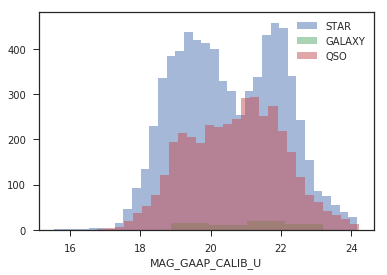

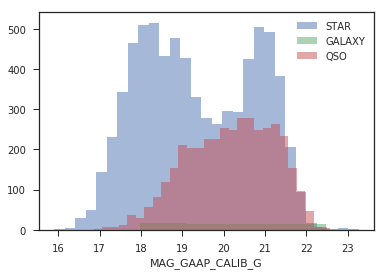

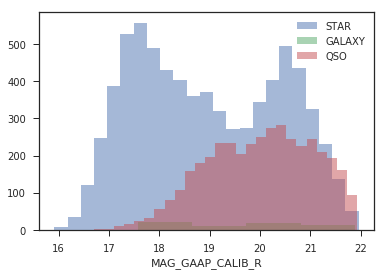

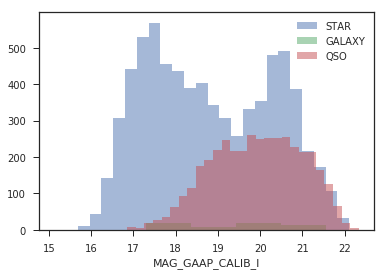

In [17]:
plot_class_histograms(kids_star_x_sdss, BAND_CALIB_COLUMNS)

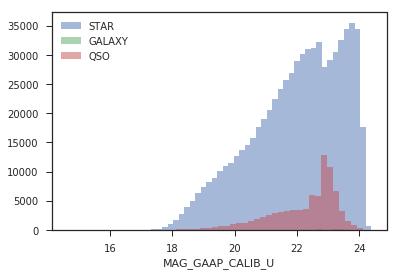

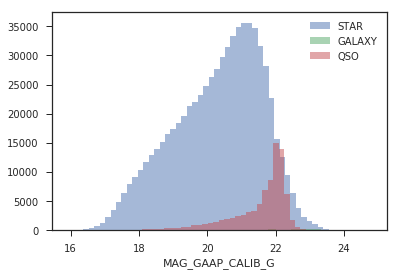

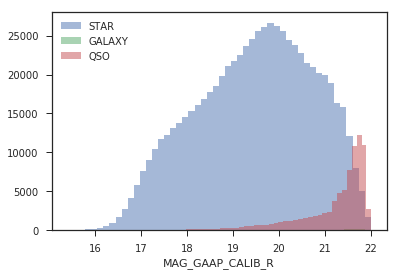

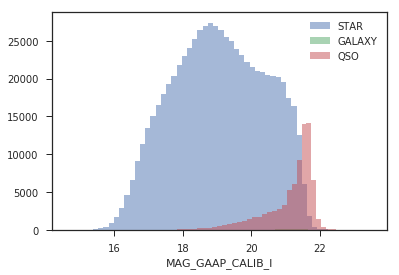

In [18]:
plot_class_histograms(kids_star_catalog, BAND_CALIB_COLUMNS)

## Paired bands

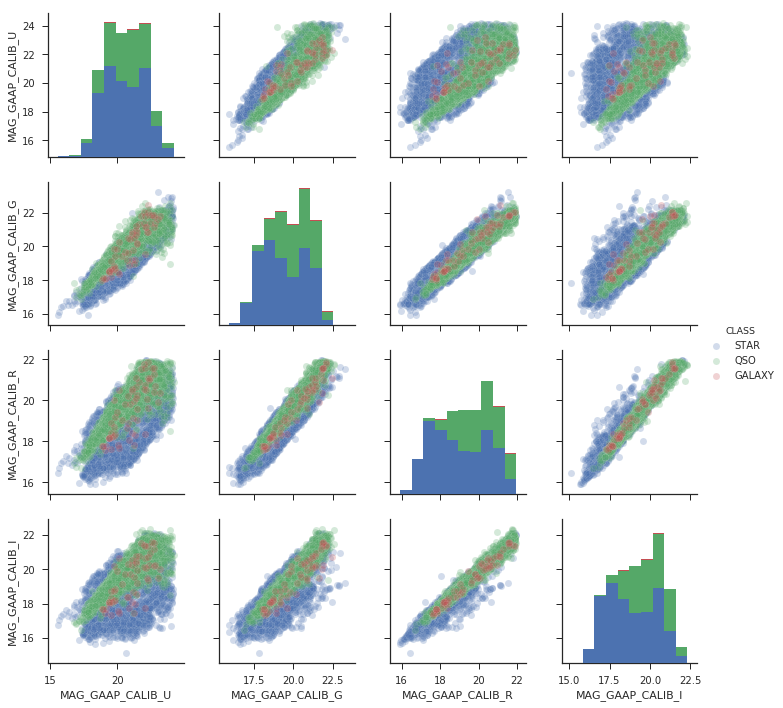

In [21]:
sns.pairplot(kids_star_x_sdss[np.concatenate([BAND_CALIB_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

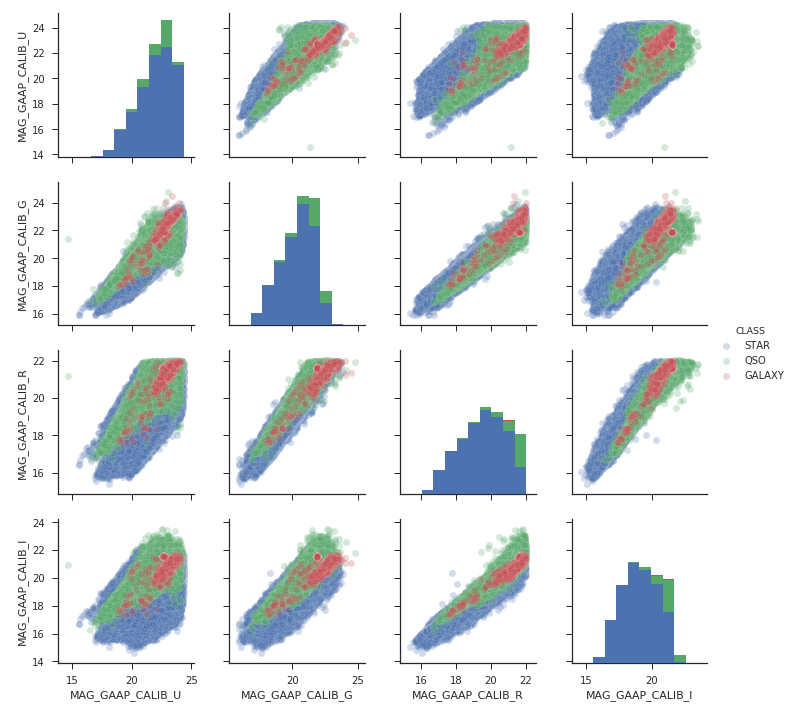

In [22]:
sns.pairplot(kids_star_catalog[np.concatenate([BAND_CALIB_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

## Standalone colors

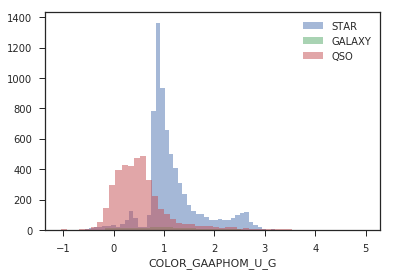

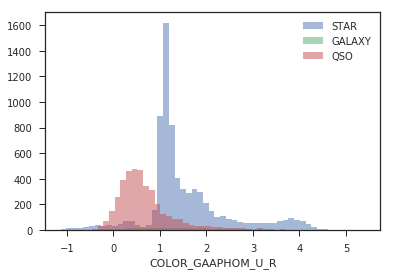

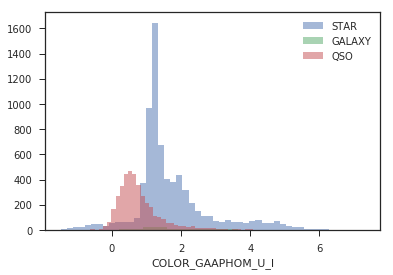

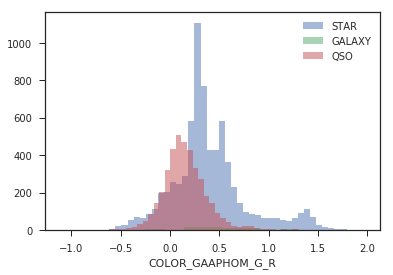

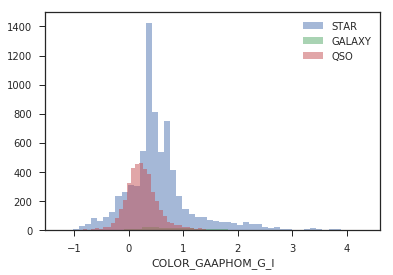

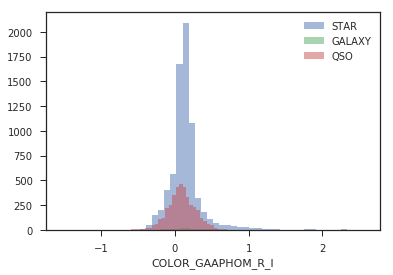

In [11]:
plot_class_histograms(kids_star_x_sdss, COLOR_COLUMNS)

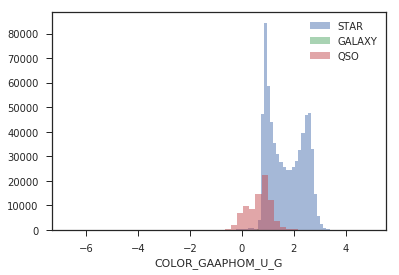

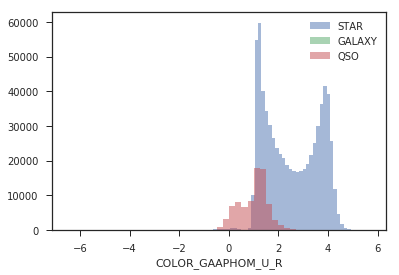

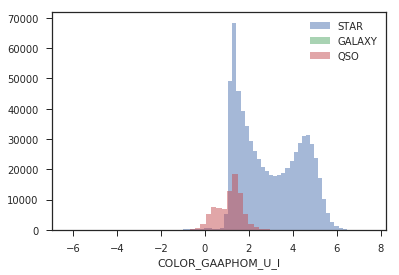

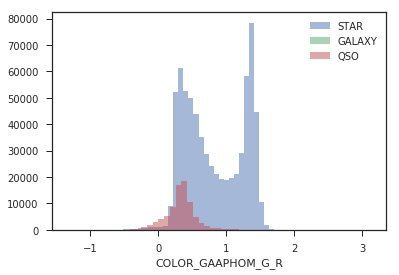

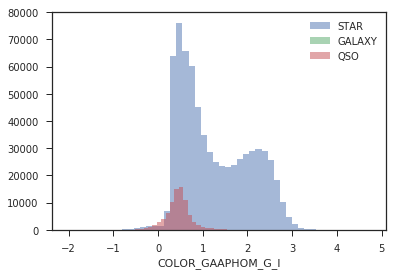

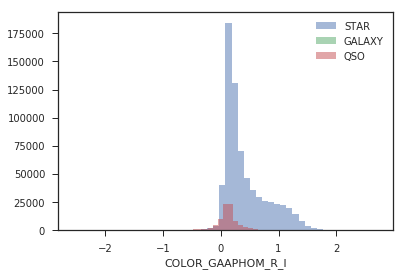

In [12]:
plot_class_histograms(kids_star_catalog, COLOR_COLUMNS)

## Paired colors

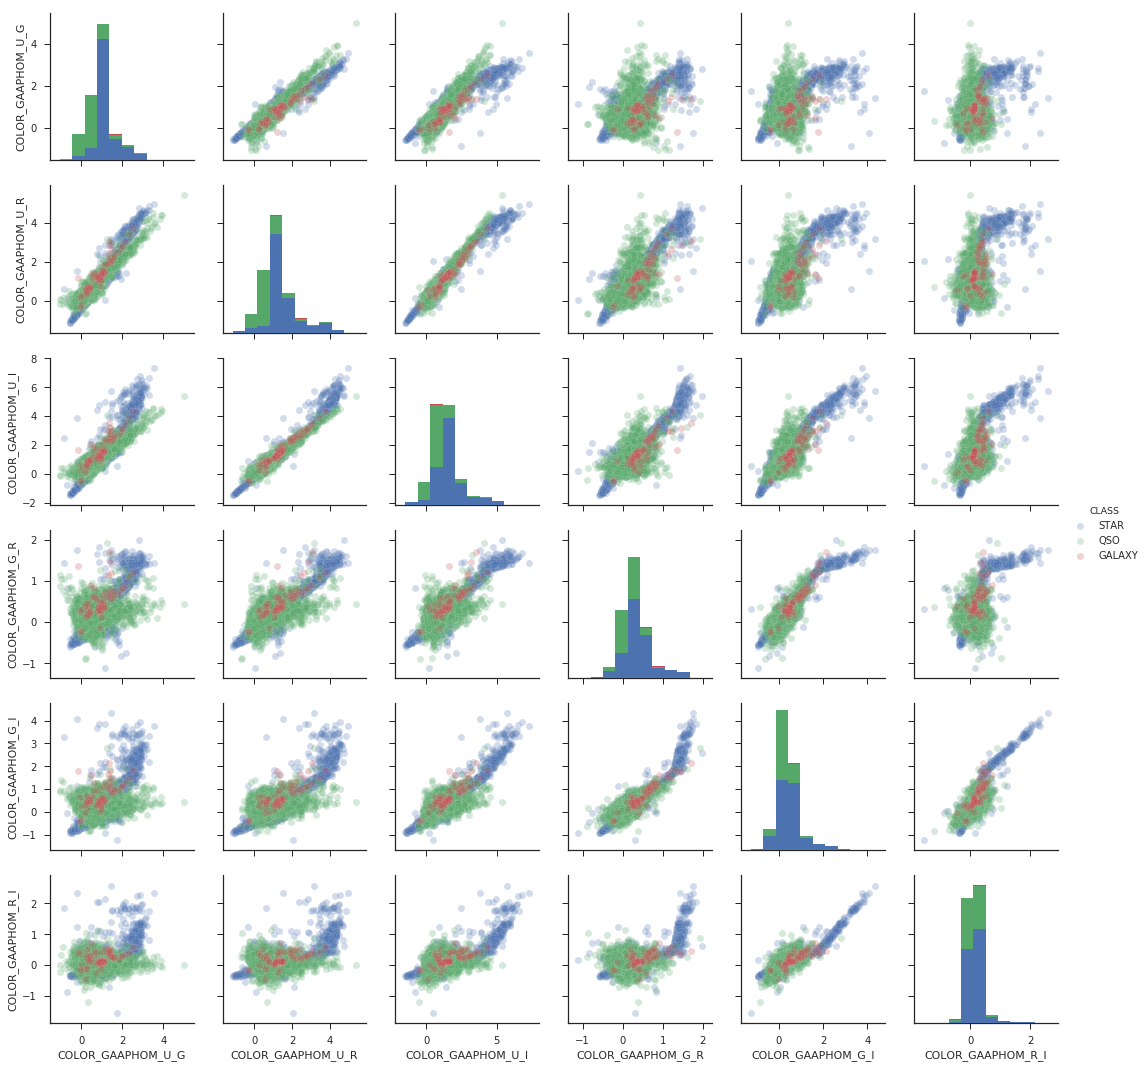

In [24]:
sns.pairplot(kids_star_x_sdss[np.concatenate([COLOR_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

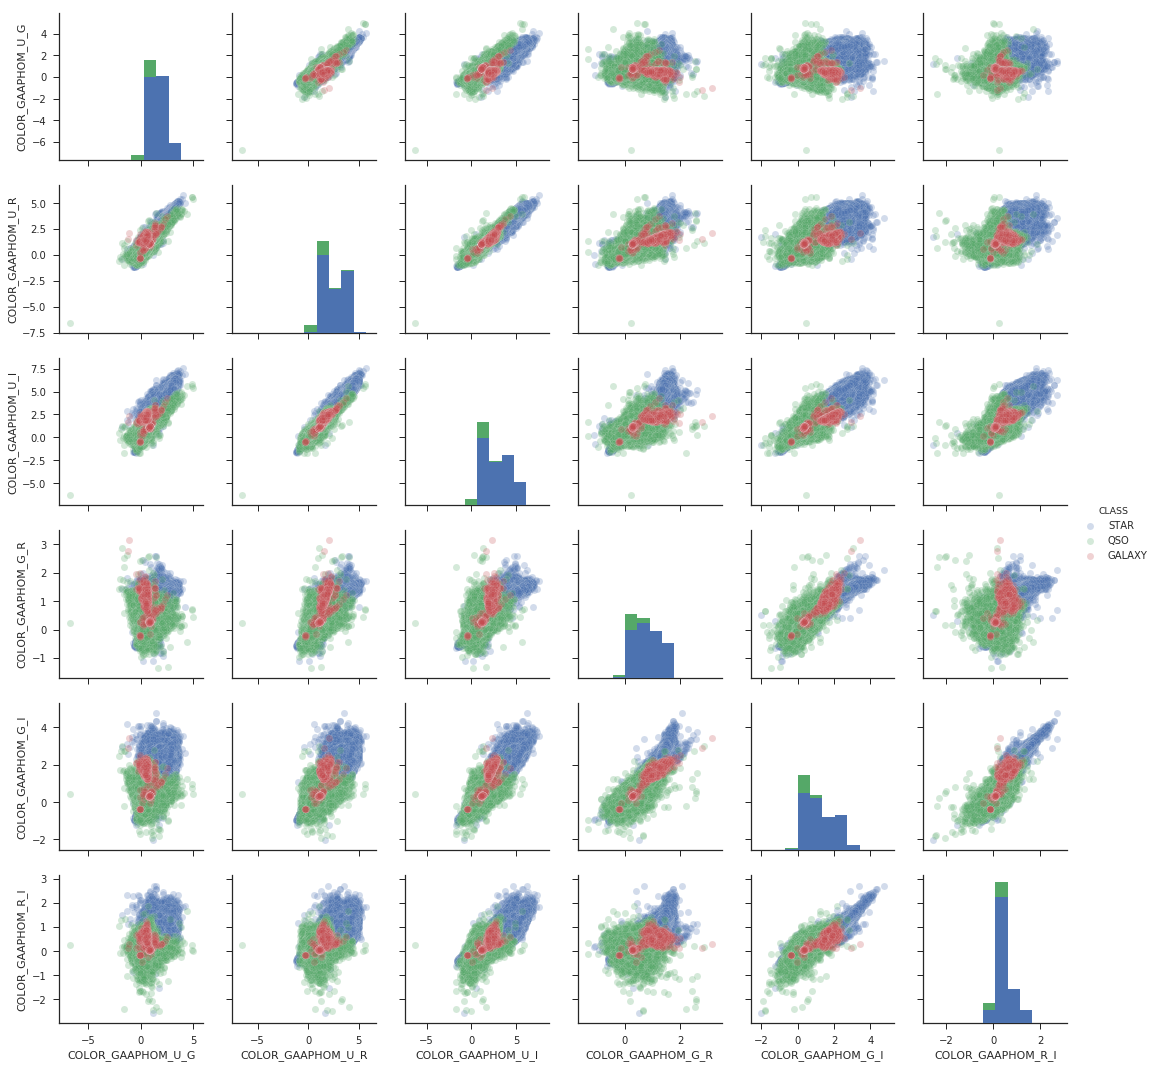

In [25]:
sns.pairplot(kids_star_catalog[np.concatenate([COLOR_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

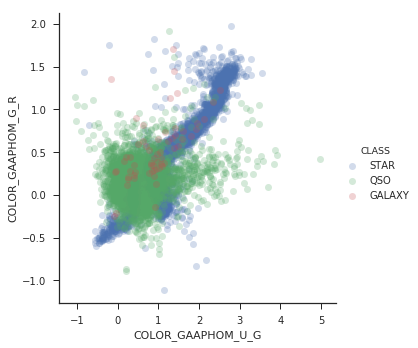

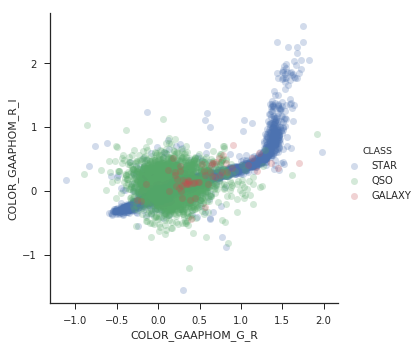

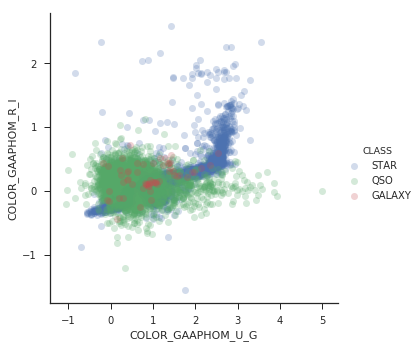

In [31]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.lmplot(x=b_1, y=b_2, hue='CLASS', data=kids_star_x_sdss, fit_reg=False, scatter_kws={'alpha': 0.25})

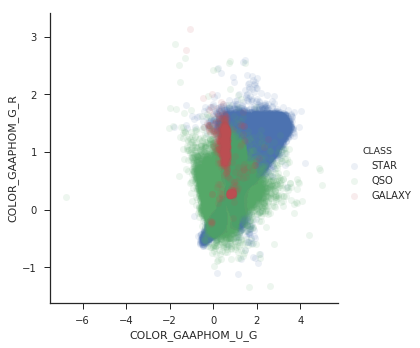

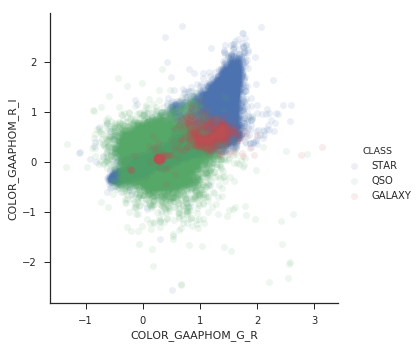

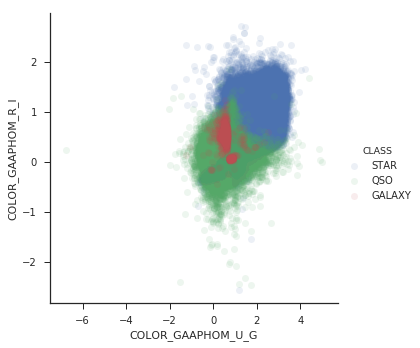

In [33]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.lmplot(x=b_1, y=b_2, hue='CLASS', data=kids_star_catalog, fit_reg=False, scatter_kws={'alpha': 0.1})

## QSO color pairs

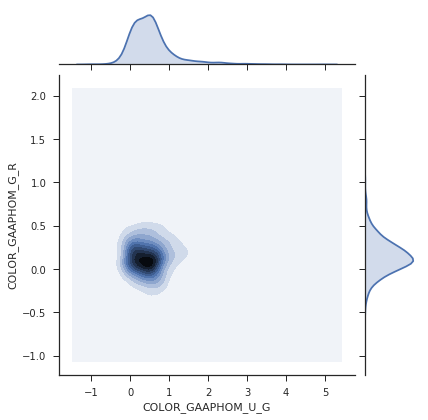

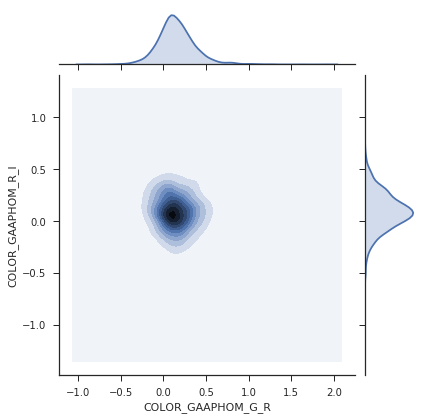

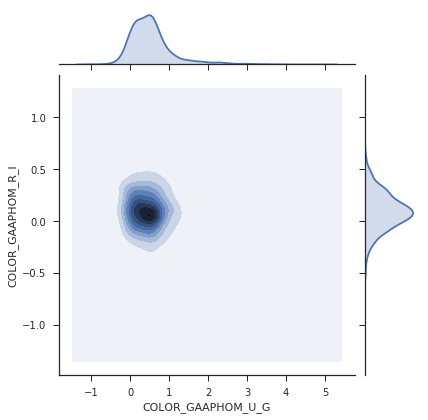

In [10]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.jointplot(qso_kids_star_sdss[b_1], qso_kids_star_sdss[b_2], kind='kde', stat_func=None)

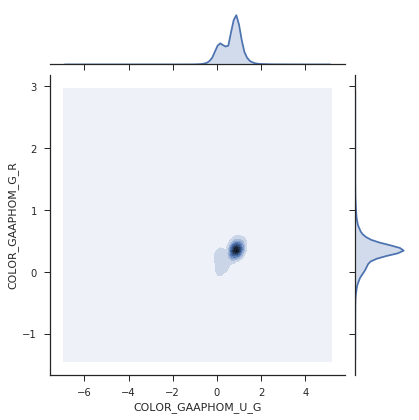

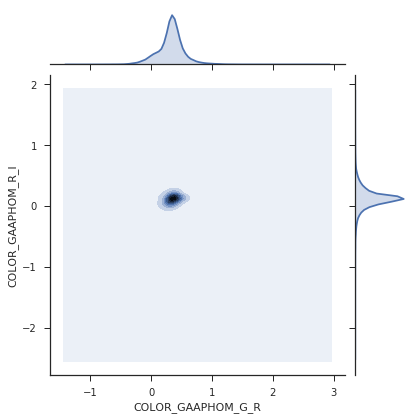

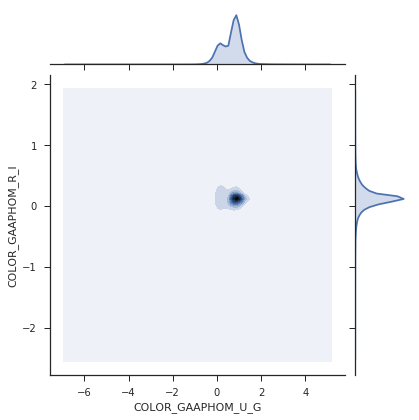

In [11]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.jointplot(qso_kids_star_catalog[b_1], qso_kids_star_catalog[b_2], kind='kde', stat_func=None)

# Number counts analysis

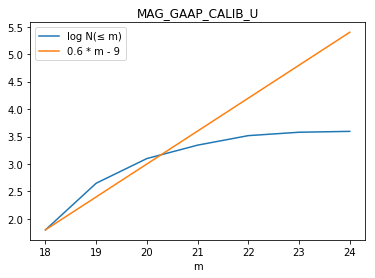

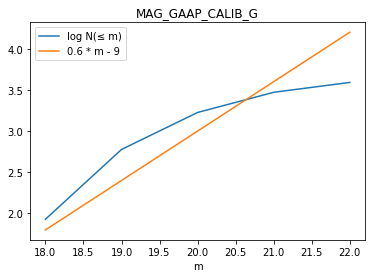

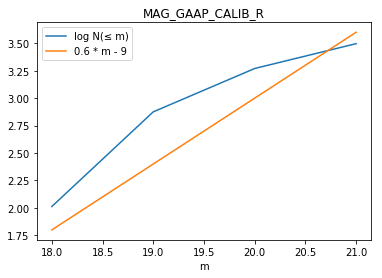

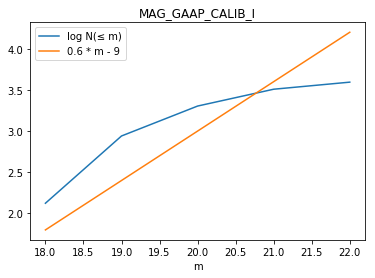

In [14]:
number_count_analysis(qso_kids_star_sdss, c=9)

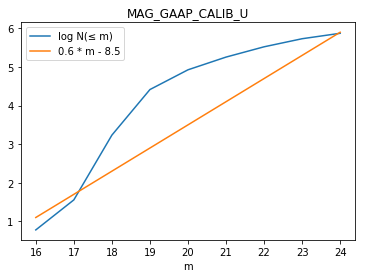

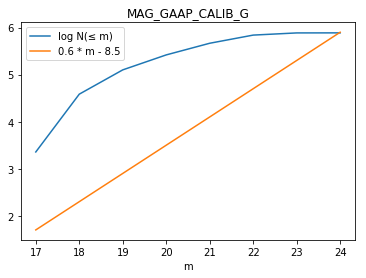

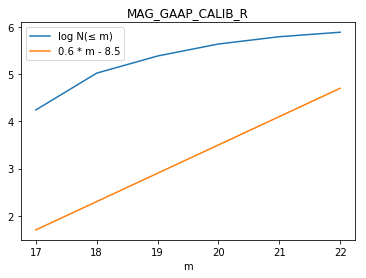

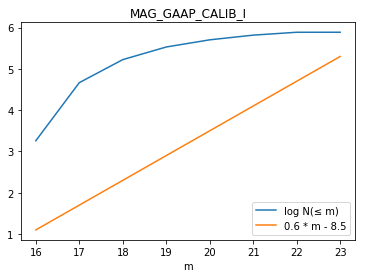

In [17]:
number_count_analysis(kids_star_catalog, c=8.5)

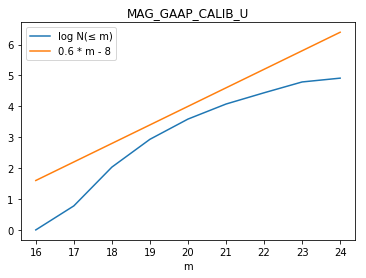

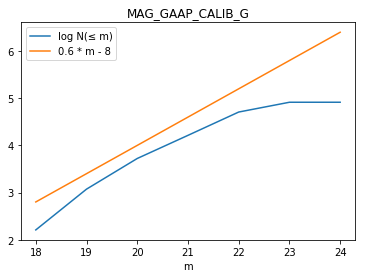

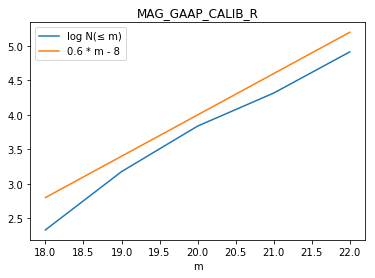

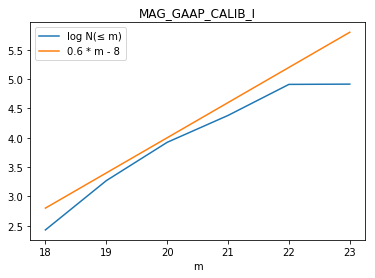

In [19]:
number_count_analysis(qso_kids_star_catalog, c=8)